In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
#import matplotlib.pyplot as plt % matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [3]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
df1

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
df1.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


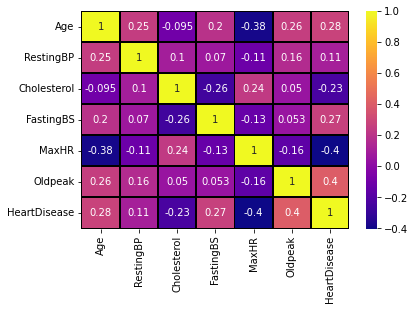

In [6]:
tc = df1.corr()
sns.heatmap(tc, annot = True, cmap ='plasma',
            linecolor ='black', linewidths = 1)

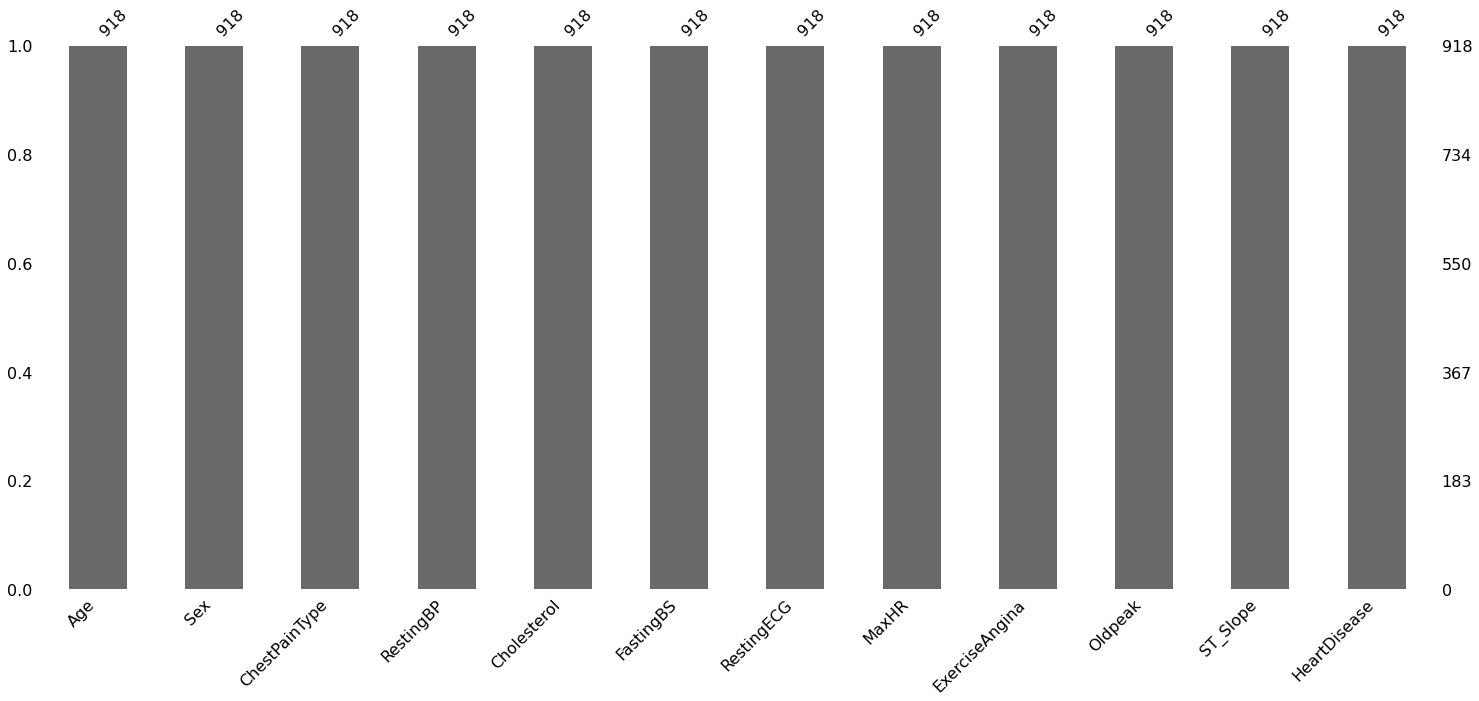

In [7]:
msno.bar(df1)

In [8]:
df1 = pd.get_dummies(df1) 

In [9]:
corr_matrix=df1.corr()
corr_matrix['HeartDisease'].sort_values(ascending=False)

HeartDisease         1.000000
ST_Slope_Flat        0.554134
ChestPainType_ASY    0.516716
ExerciseAngina_Y     0.494282
Oldpeak              0.403951
Sex_M                0.305445
Age                  0.282039
FastingBS            0.267291
ST_Slope_Down        0.122527
RestingBP            0.107589
RestingECG_ST        0.102527
RestingECG_LVH       0.010670
ChestPainType_TA    -0.054790
RestingECG_Normal   -0.091580
ChestPainType_NAP   -0.212964
Cholesterol         -0.232741
Sex_F               -0.305445
MaxHR               -0.400421
ChestPainType_ATA   -0.401924
ExerciseAngina_N    -0.494282
ST_Slope_Up         -0.622164
Name: HeartDisease, dtype: float64

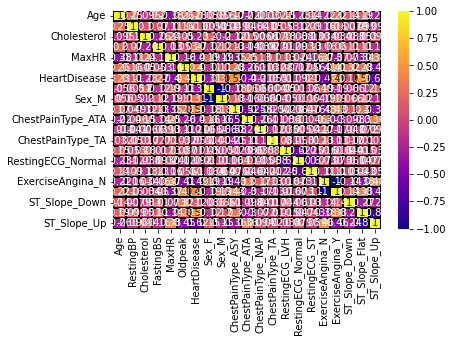

In [10]:
tc = df1.corr()
sns.heatmap(tc, annot = True, cmap ='plasma',
            linecolor ='black', linewidths = 1)

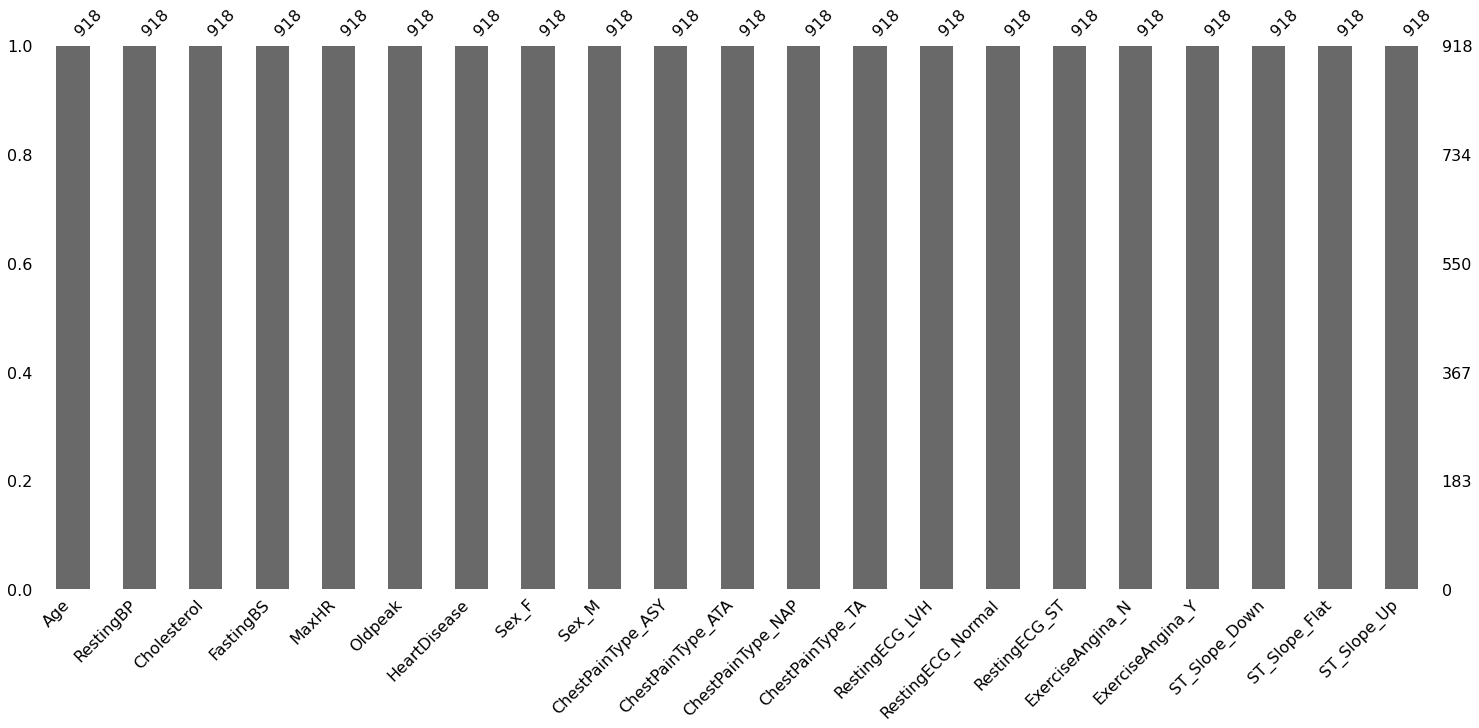

In [11]:
msno.bar(df1)

In [12]:
pd.value_counts(df1['Cholesterol'])

0      172
254     11
223     10
220     10
230      9
      ... 
392      1
316      1
153      1
466      1
131      1
Name: Cholesterol, Length: 222, dtype: int64

In [13]:
pd.value_counts(df1['RestingBP'])

120    132
130    118
140    107
110     58
150     55
      ... 
185      1
98       1
92       1
113      1
164      1
Name: RestingBP, Length: 67, dtype: int64

In [14]:
for i in range(len(df1['Cholesterol'])):
  if(df1['Cholesterol'][i]==0 or df1['RestingBP'][i]==0):
    df1=df1.drop(i)

In [15]:
df1

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [16]:
x=df1['HeartDisease']

In [17]:
df1=df1.drop(['HeartDisease'],axis=1)

In [18]:
from sklearn.preprocessing import StandardScaler
a=df1.columns

In [19]:
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(df1)

# transform training data
df = norm.transform(df1)

In [20]:
df1

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,48,138,214,0,108,1.5,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,54,150,195,0,122,0.0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,0,1,0,0,0,1,0,1,0,1,0,0,1,0
914,68,144,193,1,141,3.4,0,1,1,0,0,0,0,1,0,1,0,0,1,0
915,57,130,131,0,115,1.2,0,1,1,0,0,0,0,1,0,0,1,0,1,0
916,57,130,236,0,174,0.0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [21]:
rows, cols = (20, 2)
b = [[0 for i in range(cols)] for j in range(rows)]

In [22]:
for i in range(len(a)):
  b[i][0]=min(df1[a[i]])
  b[i][1]=max(df1[a[i]])
  print(b[i])
print(b)  

[28, 77]
[92, 200]
[85, 603]
[0, 1]
[69, 202]
[-0.1, 6.2]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[0, 1]
[[28, 77], [92, 200], [85, 603], [0, 1], [69, 202], [-0.1, 6.2], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1]]


In [23]:
df1=df1.astype(float)
for i in range(len(a)):
  for j in df1.index:
    df1[a[i]][j]=(float(df1[a[i]][j])-float(b[i][0]))/((float(b[i][1])-float(b[i][0])))

In [24]:
from sklearn.model_selection import train_test_split
x1, test_set = train_test_split(df1,test_size=0.1,random_state=40)

In [25]:
y1, test_setx1 = train_test_split(x,test_size=0.1,random_state=40)

In [26]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 200 , random_state = 42)
from sklearn.neighbors import KNeighborsClassifier  
model2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  

In [27]:
model.fit(x1,y1)

RandomForestClassifier(n_estimators=200, random_state=42)

In [28]:
y_pred=model.predict(test_set)

In [29]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_setx1, y_pred))
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
cm7 = confusion_matrix(test_setx1, y_pred)
cm7

Accuracy: 0.8666666666666667


array([[29,  3],
       [ 7, 36]])

In [30]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()

In [31]:
model1.fit(x1,y1)

LogisticRegression()

In [32]:
y_pred=model1.predict(test_set)

In [33]:
print("Accuracy:",metrics.accuracy_score(test_setx1, y_pred))
cm7 = confusion_matrix(test_setx1, y_pred)
cm7

Accuracy: 0.88


array([[29,  3],
       [ 6, 37]])

In [34]:
model2.fit(x1,y1)

KNeighborsClassifier()

In [35]:
y_pred=model2.predict(test_set)

In [36]:
print("Accuracy:",metrics.accuracy_score(test_setx1, y_pred))
cm7 = confusion_matrix(test_setx1, y_pred)
cm7

Accuracy: 0.92


array([[30,  2],
       [ 4, 39]])

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
model3 = DecisionTreeClassifier(criterion="entropy", max_depth=4)

In [39]:
model3.fit(x1,y1)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [40]:
y_pred=model3.predict(test_set)

In [41]:
print("Accuracy:",metrics.accuracy_score(test_setx1, y_pred))
cm7 = confusion_matrix(test_setx1, y_pred)
cm7

Accuracy: 0.84


array([[31,  1],
       [11, 32]])

In [42]:
from sklearn.naive_bayes import GaussianNB  

In [43]:
model4 = GaussianNB()  

In [44]:
model4.fit(x1,y1)

GaussianNB()

In [45]:
y_pred=model4.predict(test_set)

In [46]:
print("Accuracy:",metrics.accuracy_score(test_setx1, y_pred))
cm7 = confusion_matrix(test_setx1, y_pred)
cm7

Accuracy: 0.9066666666666666


array([[30,  2],
       [ 5, 38]])

In [47]:
df=pd.DataFrame(columns=a,index=[0])
a

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'Sex_F', 'Sex_M', 'ChestPainType_ASY', 'ChestPainType_ATA',
       'ChestPainType_NAP', 'ChestPainType_TA', 'RestingECG_LVH',
       'RestingECG_Normal', 'RestingECG_ST', 'ExerciseAngina_N',
       'ExerciseAngina_Y', 'ST_Slope_Down', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')

In [48]:
for i in range(len(a)):
  df[a[i]][0]=0

In [49]:
def predict():
  df[a[0]][0]=int(input("Enter your age"))
  df[a[1]][0]=int(input("Enter your RestingBP"))
  df[a[2]][0]=int(input("Enter your Cholesterol"))
  df[a[3]][0]=int(input("Enter your FastingBS"))
  df[a[4]][0]=int(input("Enter your MaxHR"))
  df[a[5]][0]=int(input("Enter your Oldpeak"))
  a1=input("Enter your gender")
  a1=a1.lower()
  if(a1=="male"):
    df[a[6]][0]=1
  else:
    df[a[7]][0]=1  
  a1=input("Enter your ChestPainType")  
  a1=a1.lower()
  if(a1=="asy"):
    df[a[8]][0]=1
  elif(a1=="ata"):
    df[a[9]][0]=1  
  elif(a1=="nap"):
    df[a[10]][0]=1  
  else:
    df[a[11]][0]=1  
  a1=input("Enter your RestingECG Type")
  a1=a1.lower()
  if(a1=="lvh"):
    df[a[12]][0]=1
  elif(a1=="normal"):
    df[a[13]][0]=1
  else:
    df[a[14]][0]=1
  a1=input("Enter your ExerciseAngina")
  a1=a1.lower()
  if(a1=="n"):
    df[a[15]][0]=1
  else:
    df[a[16]][0]=1
  a1=input("Enter your ST_Slope")
  a1=a1.lower()
  if(a1=="down"):
    df[a[17]][0]=1
  elif(a1=="flat"):
    df[a[18]][0]=1
  else:
    df[a[19]][0]=1   
  for i in range(len(a)):
    df[a[i]][0]=(float(df[a[i]][0])-float(b[i][0]))/((float(b[i][1])-float(b[i][0])))
  return model2.predict(df)[0]  

In [52]:
predict()

Enter your age19
Enter your RestingBP120
Enter your Cholesterol180
Enter your FastingBS0
Enter your MaxHR120
Enter your Oldpeak1
Enter your gendermale
Enter your ChestPainTypeasy'
Enter your RestingECG Typenormal
Enter your ExerciseAnginan
Enter your ST_Slopeflat


0

In [53]:
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-0.183673,0.259259,0.183398,0.0,0.383459,0.174603,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
